This block reads the dataset directory and prints the available classes :-

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

datasetpath = "../cleaneddataset"

classes = os.listdir(datasetpath)
print(f"Classes found are :- {classes}")


Classes found are :- ['clear skin', 'dark spots', 'puffy eyes', 'wrinkles']


This block loops through each class, loads one sample image, and displays it :-

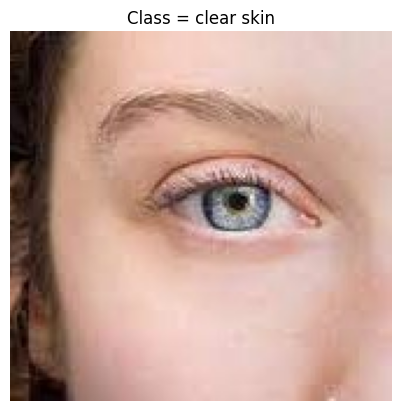

102.jpg from clear skin = (159, 164, 3)



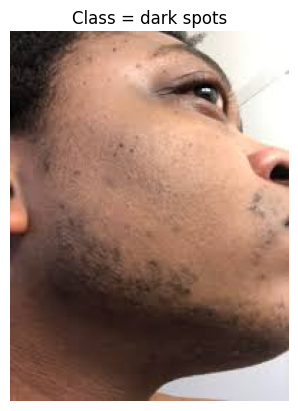

0183c6d6-8b71-4a85-a2c3-fe3fcbca3668.jpg from dark spots = (259, 195, 3)



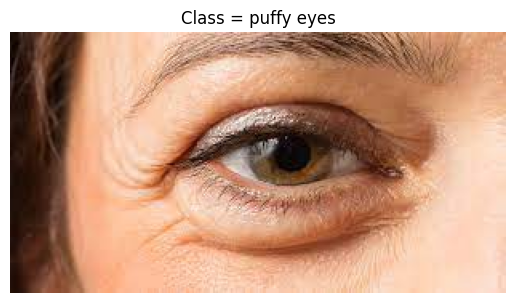

1.jpg from puffy eyes = (163, 310, 3)



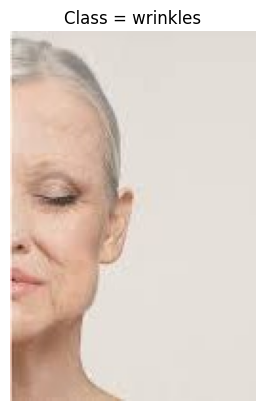

1.jpg from wrinkles = (194, 129, 3)



In [2]:
for c in classes:
    clfolder = os.path.join(datasetpath,c)
    imagename = os.listdir(clfolder)[0]
    imgagepath = os.path.join(clfolder,imagename)

    img = cv2.imread(imgagepath)
    #print(img)

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #print(img)

    plt.Figure(figsize=(3,3))
    plt.imshow(img)
    plt.title(f"Class = {c}")
    plt.axis("off")
    plt.show()
    print(f"{imagename} from {c} = {img.shape}\n")


This block counts the images in each class and visualizes the distribution using a bar graph:

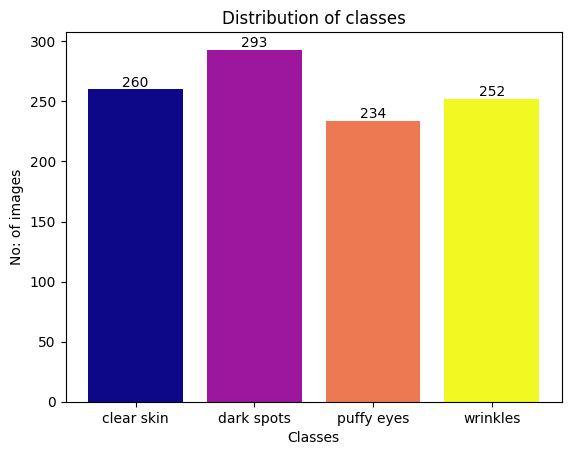

In [3]:
filecount = {}
colors = plt.cm.plasma(np.linspace(0, 1, len(classes)))

for c in classes:
    clfolder = os.path.join(datasetpath,c)
    filecount[c] = len(os.listdir(clfolder))

bargraph = plt.bar(filecount.keys(),filecount.values(),color = colors)
plt.title("Distribution of classes")
plt.xlabel("Classes")
plt.ylabel("No: of images")


for bar in bargraph:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,height,str(height),ha = "center",va = "bottom")

plt.show()

This block configures data augmentation and initializes the training and validation generators:

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

splitset = "../splittedset"
trainpath = os.path.join(splitset, "train")
valpath = os.path.join(splitset, "validation")

traingenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode="nearest"
)

valgenerator = ImageDataGenerator(rescale=1./255)

trainflow = traingenerator.flow_from_directory(
    trainpath,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

valflow = valgenerator.flow_from_directory(
    valpath,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)




Found 727 images belonging to 4 classes.
Found 208 images belonging to 4 classes.


This block displays sample original validation images and their augmented training counterparts:

Original images: 


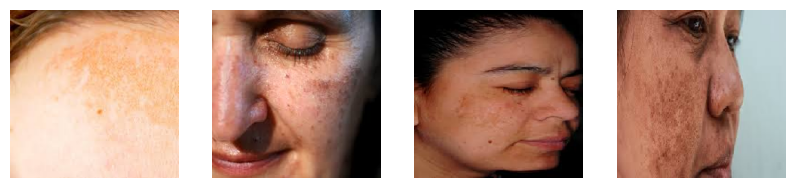

Augmented images: 


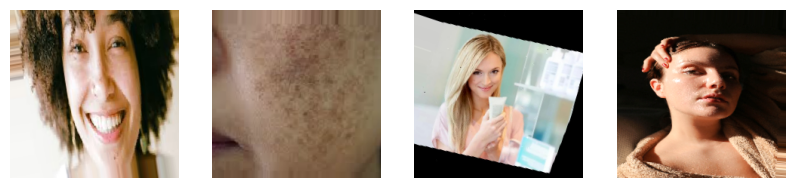

In [23]:
images, labels = next(trainflow)
images1,labels1 = next(valflow)



print("Original images: ")
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images1[i])
    plt.axis("off")
plt.show()


print("Augmented images: ")
plt.figure(figsize=(10,4))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i])
    plt.axis("off")
plt.show()

This block visualizes a single augmented image and prints its one-hot encoded label:

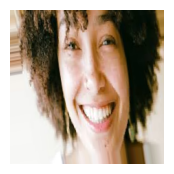

One Hot Encoding of this image :- [0. 1. 0. 0.]


In [24]:

plt.figure(figsize=(2,2))
plt.imshow(images[0])
plt.axis("off")
plt.show()

print(f"One Hot Encoding of this image :- {labels[0]}")